# Global Feature Effect

In [1]:
import numpy as np
import effector

## Generate a toy dataset

In [2]:
def generate_dataset(N, x1_min, x1_max, x2_sigma, x3_sigma):
    x1 = np.concatenate((np.array([x1_min]),
                         np.random.uniform(x1_min, x1_max, size=int(N - 2)),
                         np.array([x1_max])))
    x2 = np.random.normal(loc=x1, scale=x2_sigma)
    x3 = np.random.normal(loc=np.zeros_like(x1), scale=x3_sigma)
    return np.stack((x1, x2, x3), axis=-1)


In [45]:
np.random.seed(21)

N = 1000
x1_min = 0
x1_max = 1
x2_sigma = .01
x3_sigma = 1.

X = generate_dataset(N, x1_min, x1_max, x2_sigma, x3_sigma)

## Define the model

In [46]:
def predict(x):
    y = 7*x[:, 0] - 3*x[:, 1] + 4*x[:, 2]
    return y

def predict_grad(x):
    df_dx1 = 7 * np.ones([x.shape[0]])
    df_dx2 = -3 * np.ones([x.shape[0]])
    df_dx3 = 4 * np.ones([x.shape[0]])
    return np.stack([df_dx1, df_dx2, df_dx3], axis=-1)

## Feature effect plot

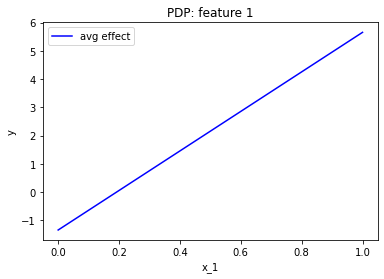

In [47]:
effector.PDP(data=X, model=predict).plot(feature=0)

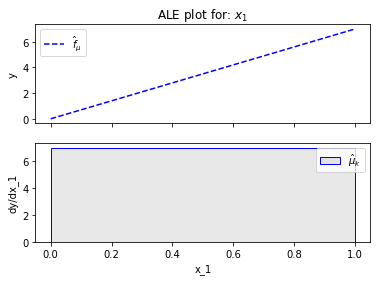

In [48]:
effector.RHALE(data=X, model=predict, model_jac=predict_grad).plot(feature=0)

### Let's take a further step into effector API

As you can see, above the two plots are not identical; PDP plot starts from $y=-1$ and stop at $y=6$, whereas RHALE starts goes from $y=0$ to $y=7$.
With a more carefull view, we can see that this is only a mater of shift at the y axis and both lines have the same slope.

`Effector` provides a set of parameters to configure such details. For example, setting `centering=True` will make both plots look identical

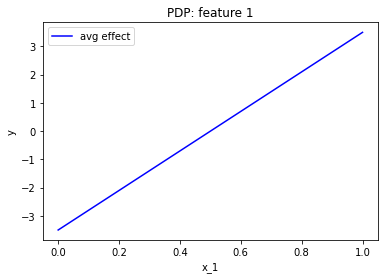

In [49]:
effector.PDP(data=X, model=predict).plot(feature=0, centering=True)

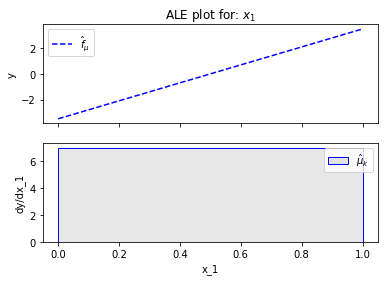

In [50]:
effector.RHALE(data=X, model=predict, model_jac=predict_grad).plot(feature=0, centering=True)

# Define a model with interactions

In [51]:
def predict(x):
    y = 7*x[:, 0] - 3*x[:, 1] + 4*x[:, 2] + 2*x[:, 0]*x[:, 2]
    return y

def predict_grad(x):
    df_dx1 = 7 + 2*x[:, 2]
    df_dx2 = -3 * np.ones([x.shape[0]])
    df_dx3 = 4 * np.ones([x.shape[0]]) + 2*x[:, 0]
    return np.stack([df_dx1, df_dx2, df_dx3], axis=-1)

### PDP and ICE

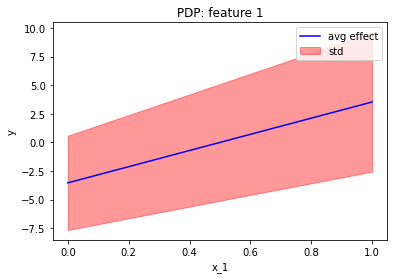

In [52]:
effector.PDP(data=X, model=predict).plot(feature=0, centering=True, uncertainty=True)

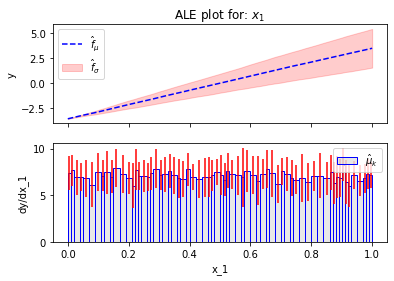

In [53]:
effector.RHALE(data=X, model=predict, model_jac=predict_grad).plot(feature=0, uncertainty=True)

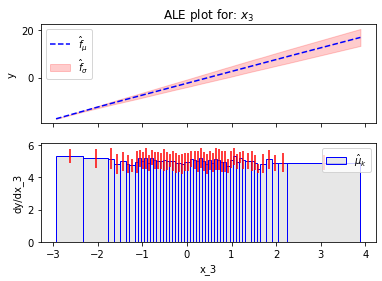

In [57]:
rhale = effector.RHALE(data=X, model=predict, model_jac=predict_grad)
rhale.fit(features="all")
rhale.plot(feature=2, centering=True, uncertainty=True)

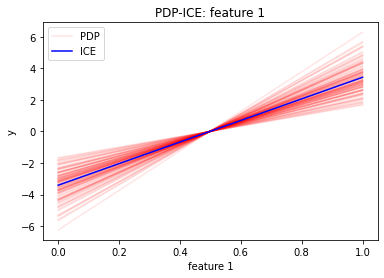

In [58]:
### ICE
effector.PDPwithICE(data=X, model=predict).plot(feature=0, centering=True)